In [132]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import SelectPercentile, SelectKBest
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('DC_Properties.csv', index_col=0)

/Users/gustikresna/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Data Understanding

In [4]:
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [7]:
df.shape

(158957, 48)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158957 entries, 0 to 158956
Data columns (total 48 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BATHRM              158957 non-null  int64  
 1   HF_BATHRM           158957 non-null  int64  
 2   HEAT                158957 non-null  object 
 3   AC                  158957 non-null  object 
 4   NUM_UNITS           106696 non-null  float64
 5   ROOMS               158957 non-null  int64  
 6   BEDRM               158957 non-null  int64  
 7   AYB                 158686 non-null  float64
 8   YR_RMDL             80928 non-null   float64
 9   EYB                 158957 non-null  int64  
 10  STORIES             106652 non-null  float64
 11  SALEDATE            132187 non-null  object 
 12  PRICE               98216 non-null   float64
 13  QUALIFIED           158957 non-null  object 
 14  SALE_NUM            158957 non-null  int64  
 15  GBA                 106696 non-nul

Feature Description

In [117]:
desc = pd.read_excel('/content/drive/MyDrive/Purwadhika - Final Project/Data Description.xlsx')

In [118]:
desc

,Feature,Data Type,Description
0,BATHRM,int64,Number of bathroom
1,HF_BATHRM,int64,Number of half bathroom (no bathtub or shower)
2,HEAT,object,Heating type
3,AC,object,Has AC? (Y/N)
4,NUM_UNITS,float64,Number of units
5,ROOMS,int64,Number of rooms
6,BEDRM,int64,Number of bedroom
7,AYB,float64,The earliest time the main portion of the buil...
8,YR_RMDL,float64,The year structure was remodeled
9,EYB,int64,The year an improvement was built more recent ...


Features of concern :
- QUALIFIED : since it is an internally-used indicator to reflect if a sale is representative of market value, the unqualified value means the price can be mismatch
- SALE_NUM : Just start to be collected in May 2014. Not apple to apple with the whole dataset
- STORIES and STYLE basically represent similar values
- GIS_LAST_MOD_DTTM and SOURCE tell about the data version and source. Does not have relation with price
- GBA and LIVING GBA represent similar values
- FULL ADDRESS is unique
- LATITUDE with Y and  LONGITUDE with X is the same

# Exploratory Data Analysis

Rooms

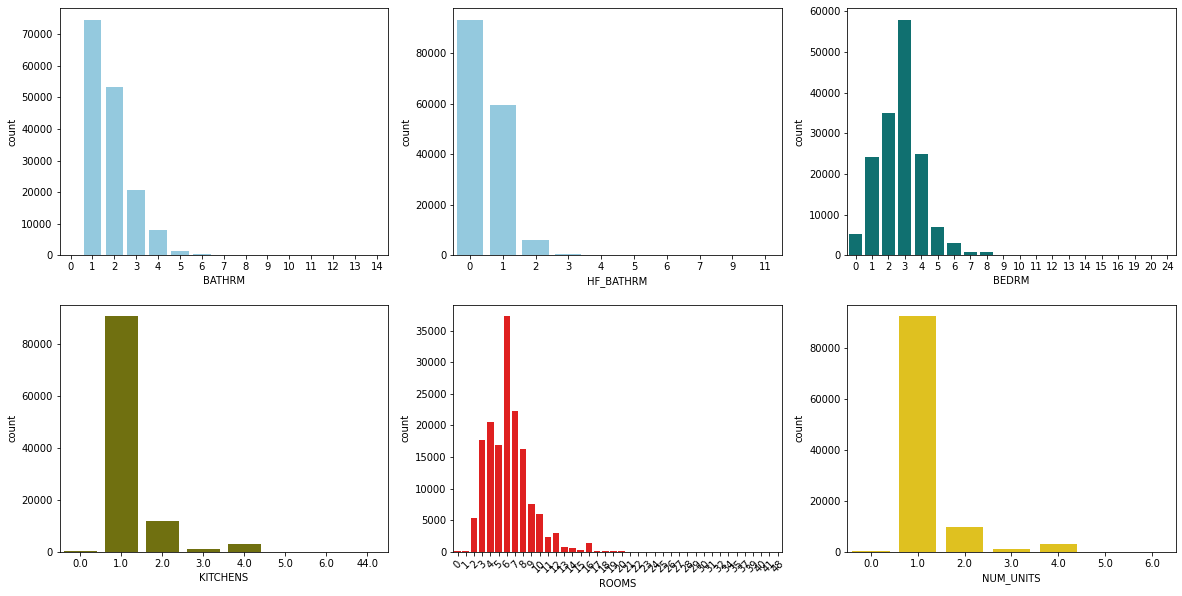

In [151]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

sns.countplot(data=df, x='BATHRM', color='skyblue', ax=ax[0, 0])
sns.countplot(data=df, x='HF_BATHRM', color='skyblue', ax=ax[0, 1])
sns.countplot(data=df, x='BEDRM', color='teal', ax=ax[0, 2])
sns.countplot(data=df, x='KITCHENS', color='olive', ax=ax[1, 0])
sns.countplot(data=df, x='ROOMS', color='red', ax=ax[1, 1])
sns.countplot(data=df, x='NUM_UNITS', color='gold', ax=ax[1, 2])

ax[1,1].tick_params(axis='x', rotation=45)

plt.show()

Building Structure

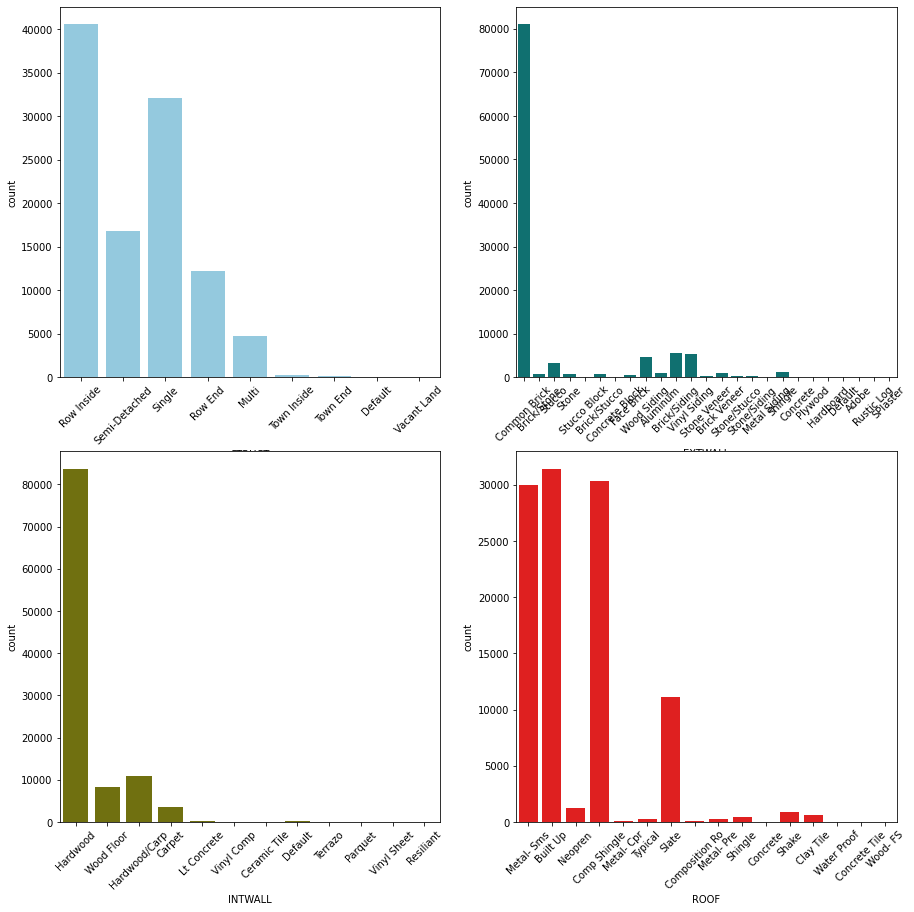

In [157]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

sns.countplot(data=df, x='STRUCT', color='skyblue', ax=ax[0, 0])
sns.countplot(data=df, x='EXTWALL', color='teal', ax=ax[0, 1])
sns.countplot(data=df, x='INTWALL', color='olive', ax=ax[1, 0])
sns.countplot(data=df, x='ROOF', color='red', ax=ax[1, 1])

for i in range(2):
  for j in range(2):
    ax[i,j].tick_params(axis='x', rotation=45)

plt.show()

Condition

Type

Area Size

Location

Times

## Missing Values

In [77]:
df.isna().sum().sort_values(ascending=False)

LIVING_GBA            106696
CMPLX_NUM             106696
YR_RMDL                78029
PRICE                  60741
FULLADDRESS            52917
CENSUS_BLOCK           52906
NATIONALGRID           52906
STATE                  52906
CITY                   52906
STORIES                52305
KITCHENS               52262
ROOF                   52261
EXTWALL                52261
CNDTN                  52261
GRADE                  52261
STRUCT                 52261
INTWALL                52261
GBA                    52261
NUM_UNITS              52261
STYLE                  52261
ASSESSMENT_SUBNBHD     32551
SALEDATE               26770
AYB                      271
Y                        237
QUADRANT                 237
X                        237
ASSESSMENT_NBHD            1
WARD                       1
ZIPCODE                    1
LATITUDE                   1
LONGITUDE                  1
CENSUS_TRACT               1
HF_BATHRM                  0
HEAT                       0
AC            

In [ ]:
df.isna

In [122]:
df_na = df.isnull().sum() / len(df) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
df_na = pd.DataFrame(df_na, columns=['% of NA'])
df_na

,% of NA
CMPLX_NUM,67.122555
LIVING_GBA,67.122555
YR_RMDL,49.088118
PRICE,38.212221
FULLADDRESS,33.290135
NATIONALGRID,33.283215
CENSUS_BLOCK,33.283215
CITY,33.283215
STATE,33.283215
STORIES,32.905125


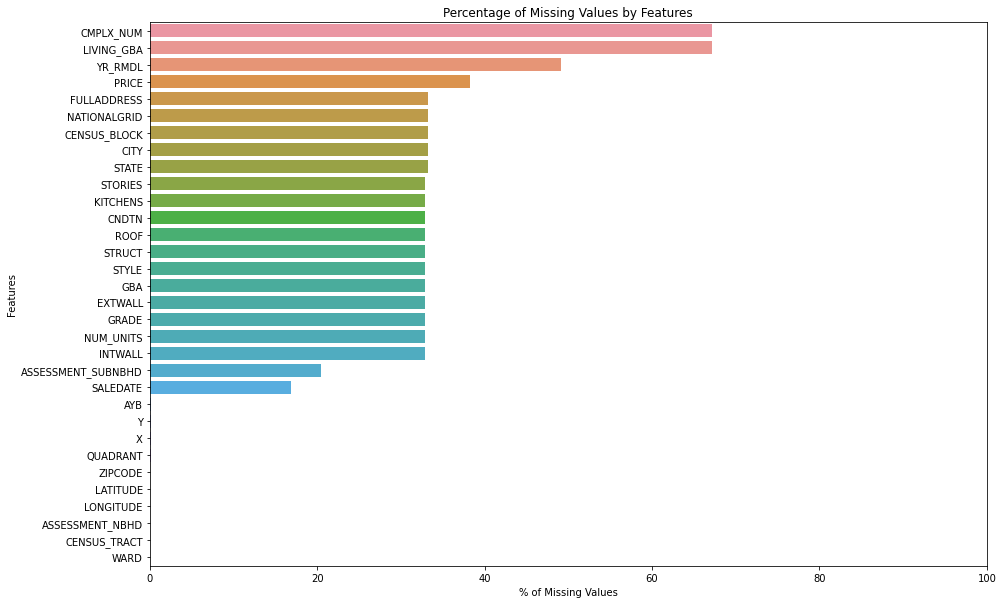

In [115]:
plt.figure(figsize=(15,10))
plt.title('Percentage of Missing Values by Features')
sns.barplot(x=df_na.iloc[:,0], y=df_na.index)
plt.xlabel('% of Missing Values')
plt.ylabel('Features')
plt.xlim([0,100])
plt.show()

- Drop CMPLX_NUM, LIVING_GBA since most of the data is NA


In [130]:
df[df['STORIES']==250]['USECODE']

20491    11
Name: USECODE, dtype: int64

PRICE vs QUALIFIED

Q    76233
U    21983
Name: QUALIFIED, dtype: int64


<AxesSubplot:xlabel='QUALIFIED', ylabel='count'>

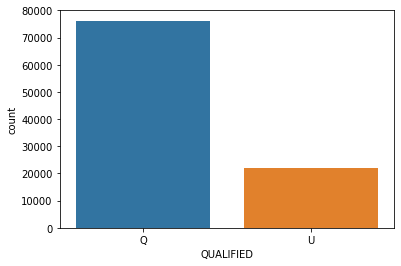

In [21]:
price_avail = df[~df['PRICE'].isna()]
print(price_avail['QUALIFIED'].value_counts())

sns.countplot(x=price_avail['QUALIFIED'])

In [117]:
df_clean = df.copy().drop(['GIS_LAST_MOD_DTTM','CMPLX_NUM','LIVING_GBA','SALEDATE','STYLE','FULLADDRESS','X','Y'],axis=1)
df_clean.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,NW


In [118]:
df_clean = df_clean[~df_clean['PRICE'].isna()]

In [119]:
df_clean = df_clean.drop(['CITY','STATE','YR_RMDL','ASSESSMENT_SUBNBHD','NATIONALGRID'],axis=1)

In [120]:
df_clean.shape

(98216, 35)

In [121]:
df_clean = df_clean.dropna()

In [123]:
df_clean.shape

(57345, 35)

In [131]:
df_clean['QUALIFIED'].value_counts()

Q    45577
U    11768
Name: QUALIFIED, dtype: int64

In [125]:
df_clean.to_csv('df_clean.csv')

### Check Features Values

In [11]:
df['BATHRM'].value_counts()

1     74555
2     53325
3     20785
4      8119
5      1367
6       500
7       129
8        71
0        58
9        22
10       14
11        7
12        3
14        1
13        1
Name: BATHRM, dtype: int64

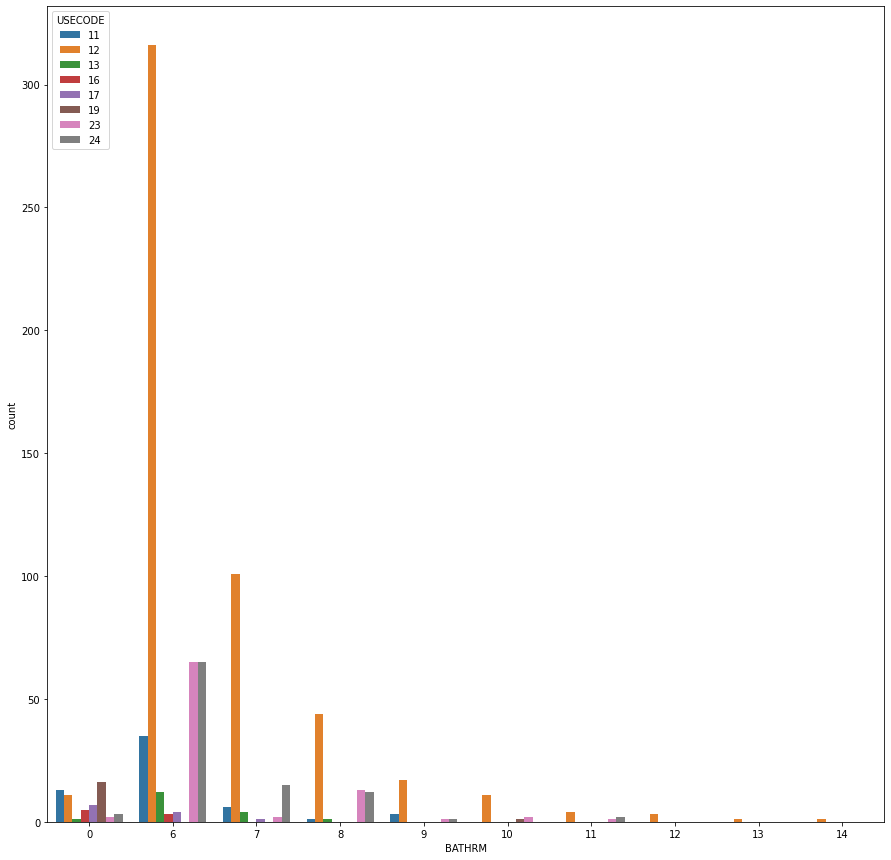

In [145]:
bathrm_outlier = df[(df['BATHRM']==0) | (df['BATHRM']>5)]
plt.figure(figsize=(15,15))
sns.countplot(x='BATHRM', data=bathrm_outlier, hue='USECODE')
plt.show()

zero bathroom should be checked

In [12]:
df['HF_BATHRM'].value_counts()

0     93148
1     59258
2      6186
3       289
4        56
5        12
7         3
6         3
11        1
9         1
Name: HF_BATHRM, dtype: int64

In [13]:
df['HEAT'].value_counts()

Forced Air        53972
Hot Water Rad     47202
Warm Cool         33628
Ht Pump           21412
Wall Furnace       1120
Water Base Brd      402
Elec Base Brd       351
No Data             330
Electric Rad        144
Gravity Furnac      140
Air-Oil             117
Ind Unit             50
Evp Cool             50
Air Exchng           39
Name: HEAT, dtype: int64

Outside top 4, convert to others

In [14]:
df['AC'].value_counts()

Y    114620
N     44272
0        65
Name: AC, dtype: int64

zero convert to N

In [15]:
df[df.AC=='0']

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
3304,1,0,Hot Water Rad,0,1.0,5,2,1900.0,NaN,1964,2.0,2016-04-01 00:00:00,507500.0,U,4,792.0,1,2 Story,Row Inside,Average,Good,Common Brick,Built Up,Wood Floor,1.0,1,11,663,2018-07-22 18:01:43,Residential,NaN,NaN,8 N STREET SW,WASHINGTON,DC,20024.0,18S UJ 25654 04765,38.874458,-77.009784,Old City 1,039 E Old City 1,6400.0,006400 1009,Ward 6,653,-77.010025,38.873810,SW
3305,1,0,Hot Water Rad,0,1.0,5,2,1900.0,NaN,1943,2.0,2015-10-05 00:00:00,470000.0,U,4,792.0,1,2 Story,Row Inside,Average,Average,Common Brick,Built Up,Wood Floor,1.0,1,11,663,2018-07-22 18:01:43,Residential,NaN,NaN,6 N STREET SW,WASHINGTON,DC,20024.0,18S UJ 25662 04765,38.874459,-77.009700,Old City 1,039 E Old City 1,6400.0,006400 1009,Ward 6,653,-77.010025,38.873810,SW
6000,3,1,Hot Water Rad,0,2.0,9,3,1900.0,1979.0,1969,2.0,2012-10-22 00:00:00,NaN,U,1,1926.0,1,2 Story,Row Inside,Good Quality,Average,Common Brick,Metal- Sms,Hardwood,2.0,1,24,1686,2018-07-22 18:01:43,Residential,NaN,NaN,326 F STREET NE,WASHINGTON,DC,20002.0,18S UJ 26466 07309,38.897535,-77.001078,Old City 1,039 J Old City 1,8301.0,008301 1005,Ward 6,778,-77.001088,38.898054,NE
8465,2,1,Forced Air,0,1.0,8,5,1932.0,NaN,1992,NaN,2018-03-26 00:00:00,1250000.0,U,2,8009.0,1,2.5 Story Unfin,Single,Low Quality,Poor,Brick/Stucco,Built Up,Hardwood,1.0,2,12,5180,2018-07-22 18:01:43,Residential,NaN,NaN,316 A STREET NE,WASHINGTON,DC,20002.0,18S UJ 26437 06598,38.891126,-77.001236,Capitol Hill,009 C Capitol Hill,8200.0,008200 2013,Ward 6,785,-77.001244,38.891602,NE
11541,2,0,Hot Water Rad,0,2.0,10,4,1909.0,NaN,1963,2.0,1993-12-01 00:00:00,390000.0,Q,1,1920.0,2,2 Story,Row End,Very Good,Average,Common Brick,Metal- Sms,Hardwood,2.0,0,15,1970,2018-07-22 18:01:43,Residential,NaN,NaN,1101 EAST CAPITOL STREET SE,WASHINGTON,DC,20003.0,18S UJ 27290 06352,38.889072,-76.991340,Old City 1,039 M Old City 1,6700.0,006700 2003,Ward 6,989,-76.991040,38.888447,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145852,1,0,Ht Pump,0,NaN,3,1,1923.0,NaN,1923,NaN,2013-10-04 00:00:00,352000.0,Q,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,440,2018-07-22 18:01:38,Condominium,1413.0,519.0,NaN,NaN,NaN,20010.0,NaN,38.934324,-77.026928,Columbia Heights,015 D Columbia Heights,2900.0,NaN,Ward 1,2831,-77.026930,38.934332,NW
145853,1,0,Ht Pump,0,NaN,3,1,1923.0,NaN,1923,NaN,2013-10-22 00:00:00,324900.0,Q,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,402,2018-07-22 18:01:38,Condominium,1413.0,573.0,NaN,NaN,NaN,20010.0,NaN,38.934324,-77.026928,Columbia Heights,015 D Columbia Heights,2900.0,NaN,Ward 1,2831,-77.026930,38.934332,NW
145854,1,0,Ht Pump,0,NaN,2,0,1923.0,NaN,1923,NaN,2014-01-28 00:00:00,251400.0,Q,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,288,2018-07-22 18:01:38,Condominium,1413.0,373.0,NaN,NaN,NaN,20010.0,NaN,38.934324,-77.026928,Columbia Heights,015 D Columbia Heights,2900.0,NaN,Ward 1,2831,-77.026930,38.934332,NW
155006,0,0,No Data,0,NaN,1,0,1920.0,1983.0,1920,NaN,2018-05-16 00:00:00,318410.0,Q,6,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,934,2018-07-22 18:01:38,Condominium,2272.0,1219.0,NaN,NaN,NaN,20001.0,NaN,38.908945,-77.019206,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,479,-77.019208,38.908952,NW


In [16]:
df['NUM_UNITS'].value_counts()

1.0    92491
2.0     9864
4.0     3059
3.0     1101
0.0      168
5.0       10
6.0        3
Name: NUM_UNITS, dtype: int64

In [17]:
df[df['NUM_UNITS']==0]

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
980,1,1,Forced Air,Y,0.0,6,3,1912.0,NaN,1967,2.0,2006-12-22 00:00:00,NaN,U,1,1216.0,1,2 Story,Single,Above Average,Good,Common Brick,Built Up,Hardwood,1.0,0,11,600,2018-07-22 18:01:43,Residential,NaN,NaN,2153 NEWPORT PLACE NW,WASHINGTON,DC,20037.0,18S UJ 22370 08565,38.908027,-77.048610,Central-tri 1,NaN,5500.0,005500 4001,Ward 2,69,-77.047778,38.907803,NW
1883,3,0,Forced Air,Y,0.0,9,5,2014.0,NaN,2015,3.0,2018-05-31 00:00:00,NaN,U,5,3540.0,1,3 Story,Row Inside,Good Quality,Good,Common Brick,Built Up,Default,1.0,0,11,1584,2018-07-22 18:01:43,Residential,NaN,NaN,1717 4TH STREET NW,WASHINGTON,DC,20001.0,18S UJ 25216 09076,38.913202,-77.015936,Old City 2,040 A Old City 2,4600.0,004600 2002,Ward 5,519,-77.015750,38.913114,NW
2388,2,0,Hot Water Rad,N,0.0,8,3,1880.0,NaN,1961,2.0,2016-03-18 00:00:00,NaN,U,3,1138.0,1,2 Story,Row Inside,Average,Good,Vinyl Siding,Built Up,Hardwood,1.0,0,11,1516,2018-07-22 18:01:43,Residential,NaN,NaN,1826 18TH STREET NW,WASHINGTON,DC,20009.0,18S UJ 22969 09323,38.914974,-77.041902,Old City 2,040 D Old City 2,4202.0,004202 2001,Ward 2,132,-77.042503,38.914980,NW
3814,2,1,Hot Water Rad,N,0.0,7,4,1890.0,NaN,1969,3.0,NaN,NaN,U,1,3124.0,1,3 Story,Row Inside,Good Quality,Average,Common Brick,Metal- Pre,Hardwood,1.0,0,11,2325,2018-07-22 18:01:43,Residential,NaN,NaN,718 3RD STREET NE,WASHINGTON,DC,20002.0,18S UJ 26367 07531,38.899512,-77.002277,Old City 1,039 J Old City 1,8301.0,008301 1003,Ward 6,752,-77.002648,38.899249,NE
5779,2,1,Warm Cool,Y,0.0,6,2,1988.0,NaN,1994,2.0,NaN,NaN,U,1,1020.0,1,2 Story,Row Inside,Above Average,Average,Common Brick,Shingle,Wood Floor,1.0,0,11,1099,2018-07-22 18:01:43,Residential,NaN,NaN,733 3RD STREET NE,WASHINGTON,DC,20002.0,18S UJ 26441 07540,38.899603,-77.001426,Old City 1,039 J Old City 1,8301.0,008301 1002,Ward 6,777,-77.001216,38.899468,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102170,2,1,Warm Cool,Y,0.0,8,3,2005.0,NaN,2009,2.0,2005-07-21 00:00:00,NaN,U,1,1360.0,1,2 Story,Row Inside,Above Average,Good,Brick/Siding,Comp Shingle,Carpet,1.0,0,11,1989,2018-07-22 18:01:43,Residential,NaN,NaN,1827 TUBMAN ROAD SE,WASHINGTON,DC,20020.0,18S UJ 28286 01866,38.848869,-76.978739,Randle Heights,043 D Randle Heights,7404.0,007404 1009,Ward 8,5882,-76.977558,38.849969,SE
102659,1,0,Forced Air,Y,0.0,5,3,1997.0,2011.0,2004,2.0,2012-01-09 00:00:00,175000.0,Q,1,1224.0,1,2 Story,Row Inside,Above Average,Good,Vinyl Siding,Comp Shingle,Hardwood/Carp,1.0,0,11,1800,2018-07-22 18:01:43,Residential,NaN,NaN,2484 SKYLAND PLACE SE,WASHINGTON,DC,20020.0,18S UJ 28714 03085,38.859938,-76.974126,Randle Heights,043 B Randle Heights,7504.0,007504 1006,Ward 8,5740,-76.972908,38.859808,SE
102691,0,0,No Data,0,0.0,0,0,NaN,NaN,1943,0.0,NaN,NaN,U,1,5082.0,1,Default,Default,No Data,Default,Default,Typical,Default,0.0,0,19,89720,2018-07-22 18:01:43,Residential,NaN,NaN,2118 RIDGECREST COURT SE,WASHINGTON,DC,20020.0,18S UJ 28822 01856,38.848884,-76.972566,Randle Heights,043 C Randle Heights,7403.0,007403 1002,Ward 8,5894,-76.973811,38.848368,SE
104206,0,0,No Data,0,0.0,0,0,2004.0,NaN,2004,0.0,2018-04-13 00:00:00,25000000.0,U,4,2000.0,1,1 Story,Default,No Data,Default,Default,Typical,Default,0.0,0,19,21017,2018-07-22 18:01:43,Residential,NaN,NaN,4242 7TH STREET SE,WASHINGTON,DC,20032.0,18S UH 26720 99647,38.828575,-76.996221,Congress Heights,016 C Congress Heights,9811.0,009811 2001,Ward 8,6208,-76.997729,38.827709,SE


In [18]:
df['ROOMS'].value_counts()

6     37259
7     22338
4     20593
3     17759
5     16852
8     16327
9      7616
10     5909
2      5294
12     2929
11     2364
16     1346
13      766
14      595
15      310
20      148
0       138
18      124
1        96
17       77
19       41
21       20
22       10
23       10
24       10
25        6
28        5
27        2
39        2
41        1
34        1
40        1
37        1
35        1
29        1
32        1
31        1
30        1
26        1
48        1
Name: ROOMS, dtype: int64

In [19]:
df['BEDRM'].value_counts()

3     57864
2     34946
4     24893
1     24181
5      6898
0      5297
6      3090
8       792
7       750
9       123
10       62
12       34
11       13
13        4
15        3
14        2
16        2
20        1
19        1
24        1
Name: BEDRM, dtype: int64

In [20]:
df['AYB'].value_counts()

1900.0    8967
1925.0    5129
1910.0    4563
1940.0    4316
1923.0    3724
          ... 
1844.0       1
1842.0       1
1841.0       1
1806.0       1
2019.0       1
Name: AYB, Length: 220, dtype: int64

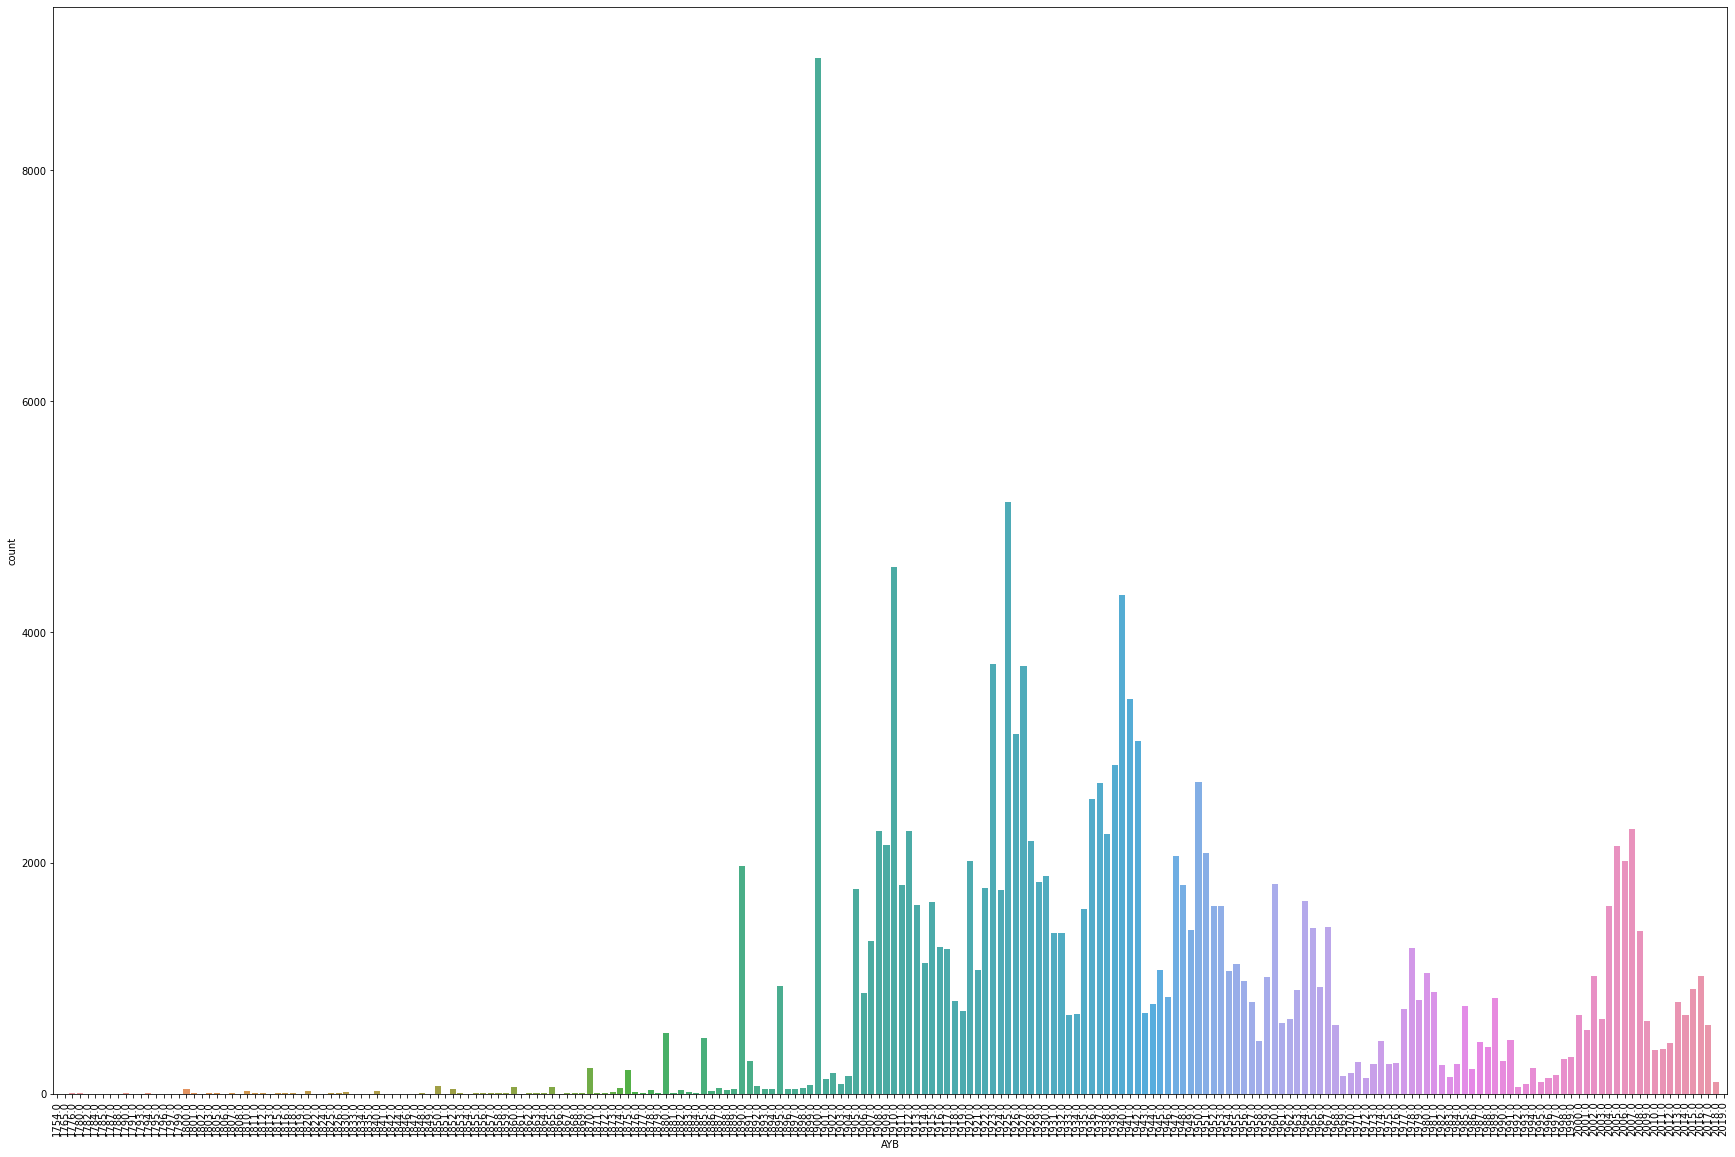

In [150]:
plt.figure(figsize=(30,20))
sns.countplot(x='AYB', data=df)
plt.xticks(rotation=90)
plt.show()


In [21]:
df['YR_RMDL'].value_counts()

2006.0    5029
2005.0    4937
2004.0    3985
2007.0    3771
1980.0    3310
          ... 
1912.0       1
1913.0       1
1915.0       1
1937.0       1
20.0         1
Name: YR_RMDL, Length: 110, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YR_RMDL'>

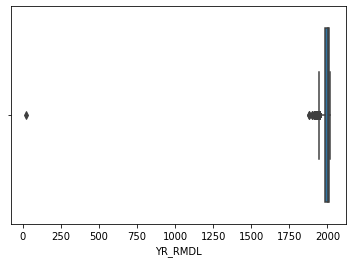

In [190]:
sns.boxplot(df['YR_RMDL'])

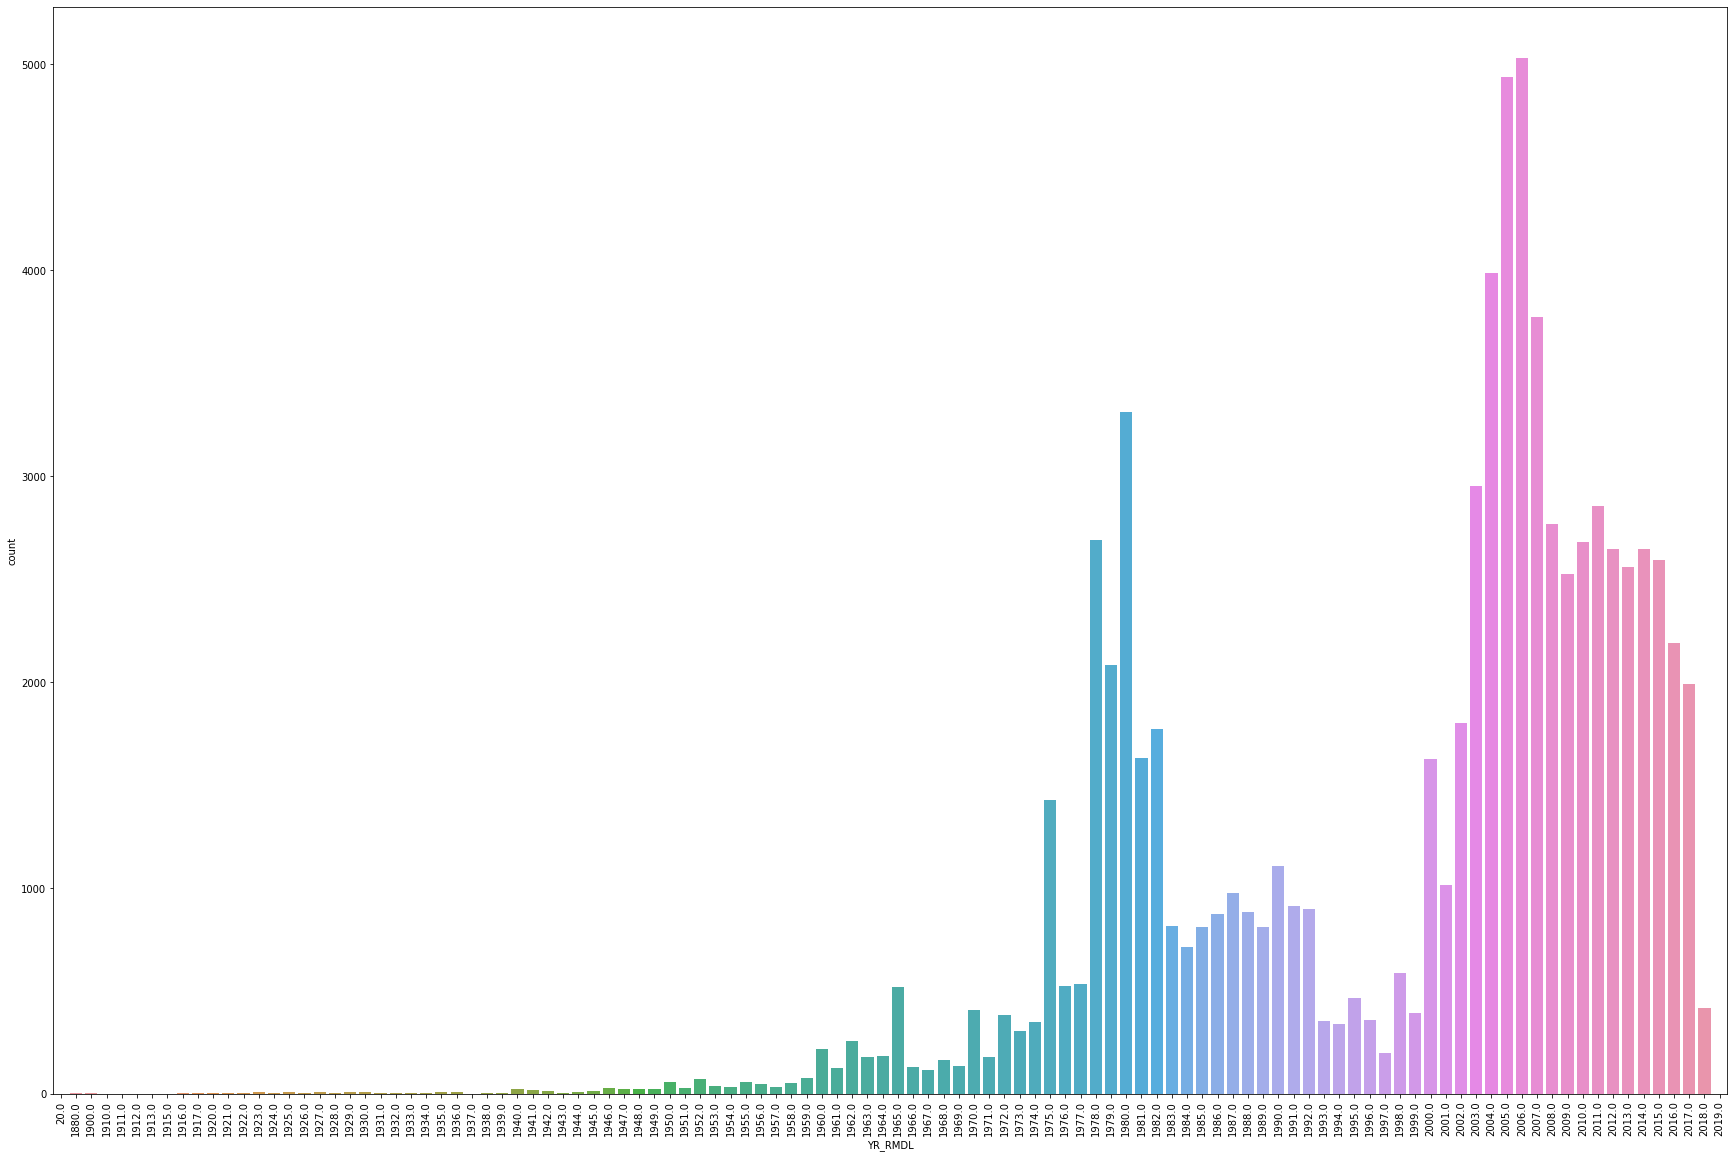

In [151]:
plt.figure(figsize=(30,20))
sns.countplot(x='YR_RMDL', data=df)
plt.xticks(rotation=90)
plt.show()


In [22]:
df['EYB'].value_counts()

1957    12541
1954    12346
1967    10408
1964     9362
1960     7636
        ...  
1876        6
1914        5
1865        4
1886        4
1800        4
Name: EYB, Length: 135, dtype: int64

In [24]:
df['SALEDATE'].value_counts()

2007-04-10 00:00:00    413
1999-04-01 00:00:00    266
2001-01-01 00:00:00    258
2015-11-17 00:00:00    160
2010-05-04 00:00:00    134
                      ... 
1995-11-28 00:00:00      1
2000-02-18 00:00:00      1
1976-01-14 00:00:00      1
1992-03-06 00:00:00      1
1980-09-24 00:00:00      1
Name: SALEDATE, Length: 6937, dtype: int64

In [25]:
df['PRICE'].describe()

count    9.821600e+04
mean     9.313516e+05
std      7.061325e+06
min      1.000000e+00
25%      2.400000e+05
50%      3.999990e+05
75%      6.520000e+05
max      1.374275e+08
Name: PRICE, dtype: float64

In [27]:
df['QUALIFIED'].value_counts()

U    82608
Q    76349
Name: QUALIFIED, dtype: int64

In [28]:
df['SALE_NUM'].value_counts()

1     113671
3      14738
2      12901
4       9851
5       4687
6       1970
7        703
8        261
9        108
10        37
11        17
12         6
13         3
15         2
14         2
Name: SALE_NUM, dtype: int64

In [30]:
df['GBA'].describe()

count    106696.000000
mean       1714.539889
std         880.677860
min           0.000000
25%        1190.000000
50%        1480.000000
75%        1966.000000
max       45384.000000
Name: GBA, dtype: float64

In [31]:
df['BLDG_NUM'].value_counts()

1    158884
2        59
3         8
4         4
5         2
Name: BLDG_NUM, dtype: int64

In [158]:
df['STORIES'].value_counts()

2.00      79357
3.00       9230
2.50       6105
1.00       4683
1.50       2291
2.25       2225
1.75       1175
1.25        452
2.75        444
4.00        375
3.50        109
0.00         43
9.00         36
2.70         28
3.25         20
3.75         15
2.20         13
5.00         11
6.00          7
1.70          4
25.00         4
2.30          3
275.00        2
4.50          2
3.70          2
7.00          2
0.25          1
2.33          1
250.00        1
3.20          1
0.50          1
12.00         1
65.00         1
8.25          1
826.00        1
43.00         1
4.75          1
1.34          1
20.00         1
0.75          1
Name: STORIES, dtype: int64

In [33]:
df['STYLE'].value_counts()

2 Story            81137
3 Story             9449
2.5 Story Fin       7000
1 Story             4420
1.5 Story Fin       2655
2.5 Story Unfin      729
4 Story              369
Split Level          303
Split Foyer          279
3.5 Story Fin        133
1.5 Story Unfin      112
Default               65
Bi-Level              19
4.5 Story Fin         13
3.5 Story Unfin        8
4.5 Story Unfin        2
Vacant                 2
Outbuildings           1
Name: STYLE, dtype: int64

In [162]:
df[df['STORIES']==20][['STYLE','STORIES']]

,STYLE,STORIES
85656,2 Story,20.0


In [35]:
df['STRUCT'].value_counts()

Row Inside       40593
Single           32063
Semi-Detached    16756
Row End          12225
Multi             4726
Town Inside        218
Town End            85
Default             26
Vacant Land          4
Name: STRUCT, dtype: int64

In [164]:
df[df['STRUCT']=='Default']

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
5126,4,0,Forced Air,Y,4.0,8,4,NaN,2006.0,1972,...,-77.014938,Old City 2,040 A Old City 2,4600.0,004600 2001,Ward 5,550,-77.014584,38.912813,NW
19274,0,0,No Data,0,0.0,0,0,1956.0,NaN,1956,...,-77.054331,Georgetown,025 H Georgetown,100.0,000100 2000,Ward 2,1264,-77.054174,38.909767,NW
20036,0,0,No Data,0,0.0,0,0,1953.0,2009.0,1953,...,-77.062106,Georgetown,025 G Georgetown,100.0,000100 3005,Ward 2,1256,-77.062742,38.909021,NW
20680,0,0,No Data,0,0.0,0,0,1998.0,NaN,1998,...,-77.057709,Georgetown,025 H Georgetown,100.0,NaN,Ward 2,1284,-77.057711,38.910936,NW
22771,0,0,No Data,0,0.0,0,0,1948.0,NaN,1948,...,-77.084539,Palisades,041 B Palisades,802.0,000802 1011,Ward 3,1366,-77.085806,38.911124,NW
23165,0,0,No Data,0,0.0,0,0,1955.0,NaN,1955,...,-77.099252,Kent,030 C Kent,902.0,NaN,Ward 3,1411,-77.099254,38.925030,NW
24906,1,0,Gravity Furnac,N,1.0,1,0,1979.0,NaN,1981,...,-77.090285,Berkley,004 B Berkley,802.0,NaN,Ward 3,1370,-77.090287,38.914680,NW
25208,0,0,No Data,0,0.0,0,0,NaN,NaN,1943,...,-77.092325,Wesley Heights,054 A Wesley Heights,801.0,NaN,Ward 3,1406,-77.092328,38.928072,NW
25411,2,0,Warm Cool,Y,1.0,5,2,1950.0,NaN,1994,...,-77.090038,Spring Valley,050 D Spring Valley,901.0,000901 3030,Ward 3,1513,-77.095868,38.933305,NW
30657,0,0,No Data,0,0.0,0,0,1971.0,NaN,1971,...,-77.081920,American University,001 C American University,1001.0,NaN,Ward 3,1727,-77.081923,38.944411,NW


In [36]:
df['GRADE'].value_counts()

Average          37357
Above Average    32101
Good Quality     20800
Very Good         8976
Excellent         3390
Superior          2634
Exceptional-A      818
Exceptional-B      278
Fair Quality       150
Exceptional-C       92
Exceptional-D       75
No Data             19
Low Quality          6
Name: GRADE, dtype: int64

In [37]:
df['CNDTN'].value_counts()

Average      58217
Good         37497
Very Good     8130
Excellent     1338
Fair          1320
Poor           175
Default         19
Name: CNDTN, dtype: int64

In [38]:
df['EXTWALL'].value_counts()

Common Brick      81068
Brick/Siding       5569
Vinyl Siding       5290
Wood Siding        4540
Stucco             3216
Shingle            1181
Brick Veneer       1069
Aluminum            954
Stone               744
Brick/Stucco        673
Brick/Stone         626
Face Brick          512
Stone/Siding        339
Stone Veneer        254
Stone/Stucco        238
Hardboard           119
Concrete             82
Metal Siding         66
Concrete Block       54
Stucco Block         51
Default              32
Plywood              15
Adobe                 2
Rustic Log            1
SPlaster              1
Name: EXTWALL, dtype: int64

In [39]:
df['ROOF'].value_counts()

Built Up          31402
Comp Shingle      30301
Metal- Sms        29957
Slate             11135
Neopren            1254
Shake               907
Clay Tile           654
Shingle             433
Metal- Pre          244
Typical             229
Composition Ro      102
Metal- Cpr           41
Concrete Tile        17
Water Proof           9
Wood- FS              7
Concrete              4
Name: ROOF, dtype: int64

In [167]:
df[df['STRUCT']=='Vacant Land']['ROOF']

21909    Typical
24465    Typical
25806    Typical
25807    Typical
Name: ROOF, dtype: object

In [40]:
df['INTWALL'].value_counts()

Hardwood         83643
Hardwood/Carp    10938
Wood Floor        8170
Carpet            3563
Lt Concrete        141
Default            110
Ceramic Tile        50
Vinyl Comp          28
Parquet             19
Resiliant           15
Vinyl Sheet         13
Terrazo              6
Name: INTWALL, dtype: int64

In [41]:
df['KITCHENS'].value_counts()

1.0     90434
2.0     11904
4.0      3051
3.0      1173
0.0       117
5.0        11
6.0         4
44.0        1
Name: KITCHENS, dtype: int64

In [172]:
df[df['KITCHENS']==44]

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
73408,4,0,Hot Water Rad,N,4.0,16,4,1939.0,2014.0,1964,...,-76.983331,Trinidad,052 A Trinidad,8804.0,008804 2004,Ward 5,4052,-76.984048,38.909103,NE


In [42]:
df['FIREPLACES'].value_counts()

0         103837
1          40567
2          10779
3           2410
4            841
5            277
6            148
7             47
8             18
9             10
10             8
11             3
12             3
13             3
4068           1
922            1
293920         1
1601           1
200            1
1017           1
Name: FIREPLACES, dtype: int64

In [182]:
df[df['FIREPLACES']==4068]['USECODE']

123974    17
Name: USECODE, dtype: int64

In [43]:
df['USECODE'].value_counts()

11     45597
12     31623
17     27511
16     24741
13     16588
24      8272
23      4497
15        79
19        31
117        8
81         4
83         2
116        1
41         1
39         1
29         1
Name: USECODE, dtype: int64

In [45]:
df['LANDAREA'].describe()

count    158957.000000
mean       2473.282158
std        5059.046023
min           0.000000
25%         697.000000
50%        1649.000000
75%        3000.000000
max      942632.000000
Name: LANDAREA, dtype: float64

In [46]:
df['GIS_LAST_MOD_DTTM'].value_counts()

2018-07-22 18:01:43    106696
2018-07-22 18:01:38     52261
Name: GIS_LAST_MOD_DTTM, dtype: int64

In [47]:
df['SOURCE'].value_counts()

Residential    106696
Condominium     52261
Name: SOURCE, dtype: int64

In [49]:
df['CMPLX_NUM'].describe()

count    52261.000000
mean      2371.544249
std       1114.272364
min       1001.000000
25%       1501.000000
50%       2265.000000
75%       2910.000000
max       5621.000000
Name: CMPLX_NUM, dtype: float64

In [51]:
df['LIVING_GBA'].describe()

count    52261.000000
mean       888.834542
std        420.185822
min          0.000000
25%        616.000000
50%        783.000000
75%       1060.000000
max       8553.000000
Name: LIVING_GBA, dtype: float64

In [52]:
df['FULLADDRESS'].value_counts()

1755 STANTON TERRACE SE     5
1754 STANTON TERRACE SE     5
1517 SHIPPEN LANE SE        4
1508 SHIPPEN LANE SE        4
2600 TILDEN STREET NW       3
                           ..
406 DIVISION AVENUE NE      1
3417 MINNESOTA AVENUE SE    1
843 ADRIAN STREET SE        1
313 M STREET NW             1
1831 S STREET SE            1
Name: FULLADDRESS, Length: 105978, dtype: int64

In [53]:
df['CITY'].value_counts()

WASHINGTON    106051
Name: CITY, dtype: int64

In [54]:
df['STATE'].value_counts()

DC    106051
Name: STATE, dtype: int64

In [55]:
df['ZIPCODE'].value_counts()

20011.0    16352
20002.0    16310
20009.0    13171
20019.0    12458
20016.0    10644
20001.0    10549
20020.0     9805
20007.0     9029
20003.0     8015
20008.0     6801
20010.0     6428
20018.0     5670
20017.0     5622
20015.0     5337
20032.0     5111
20012.0     4118
20037.0     3730
20005.0     3404
20024.0     3105
20036.0     1892
20004.0     1082
20392.0      186
20006.0      118
20052.0       19
Name: ZIPCODE, dtype: int64

In [57]:
df['NATIONALGRID'].value_counts()

18S UJ 28168 01936    5
18S UJ 28233 01950    5
18S UJ 28025 01949    4
18S UJ 25398 04622    4
18S UJ 28045 01888    4
                     ..
18S UJ 21518 10614    1
18S UJ 25789 14141    1
18S UJ 24225 10411    1
18S UJ 27838 12513    1
18S UJ 27056 06702    1
Name: NATIONALGRID, Length: 105949, dtype: int64

In [58]:
df['LATITUDE'].describe()

count    158956.000000
mean         38.914854
std           0.031723
min          38.819731
25%          38.895425
50%          38.915337
75%          38.936075
max          38.995540
Name: LATITUDE, dtype: float64

In [60]:
df['LONGITUDE'].describe()

count    158956.000000
mean        -77.016676
std           0.040938
min         -77.113909
25%         -77.042892
50%         -77.019596
75%         -76.988626
max         -76.909758
Name: LONGITUDE, dtype: float64

In [61]:
df['ASSESSMENT_NBHD'].value_counts()

Old City 2                      15978
Old City 1                      15000
Columbia Heights                 9474
Brookland                        6568
Petworth                         6323
Deanwood                         5983
Chevy Chase                      5354
Congress Heights                 4729
Brightwood                       4112
Mt. Pleasant                     4052
Capitol Hill                     3830
Georgetown                       3774
Hillcrest                        3734
Randle Heights                   3517
Fort Dupont Park                 3425
Kalorama                         3207
Central-tri 1                    3132
Cleveland Park                   3032
Trinidad                         2964
Southwest Waterfront             2828
Riggs Park                       2795
Woodridge                        2748
American University              2594
Central-tri 3                    2500
Eckington                        2328
Forest Hills                     2225
16th Street 

In [63]:
df['ASSESSMENT_SUBNBHD'].value_counts()

040 D Old City 2       4403
040 E Old City 2       2968
040 C Old City 2       2886
042 B Petworth         2763
039 K Old City 1       2640
                       ... 
050 A Spring Valley     176
004 C Berkley           154
025 A Georgetown        140
050 D Spring Valley     131
025 C Georgetown         91
Name: ASSESSMENT_SUBNBHD, Length: 121, dtype: int64

In [121]:
df['CENSUS_TRACT'].value_counts()

5500.0     2933
801.0      2620
1001.0     2552
300.0      2182
5301.0     2179
           ... 
10900.0     160
7403.0      135
7406.0      108
9810.0       88
6804.0       13
Name: CENSUS_TRACT, Length: 176, dtype: int64

In [67]:
df['CENSUS_BLOCK'].value_counts()

009000 1001    340
009201 1004    312
009509 3004    206
009904 2009    204
009508 2005    195
              ... 
008402 1000      1
007709 2007      1
010400 2013      1
000702 1005      1
005002 4003      1
Name: CENSUS_BLOCK, Length: 3848, dtype: int64

In [68]:
df['WARD'].value_counts()

Ward 6    23973
Ward 3    23688
Ward 4    22202
Ward 2    22167
Ward 5    21359
Ward 1    17455
Ward 7    17206
Ward 8    10906
Name: WARD, dtype: int64

In [71]:
df['SQUARE'].value_counts()

540     994
1601    893
1301    712
157     600
4325    559
       ... 
5646      1
2812      1
2712      1
5861      1
5735      1
Name: SQUARE, Length: 3512, dtype: int64

In [72]:
df['X'].describe()

count    158720.000000
mean        -77.016712
std           0.040933
min         -77.113135
25%         -77.042894
50%         -77.019581
75%         -76.988842
max         -76.910511
Name: X, dtype: float64

In [73]:
df['Y'].describe()

count    158720.000000
mean         38.914846
std           0.031682
min          38.820576
25%          38.895432
50%          38.915229
75%          38.936077
max          38.993646
Name: Y, dtype: float64

In [75]:
df['QUADRANT'].value_counts()

NW    89736
NE    37675
SE    27224
SW     4085
Name: QUADRANT, dtype: int64

In [188]:
df['FULLADDRESS'].value_counts()

1754 STANTON TERRACE SE    5
1755 STANTON TERRACE SE    5
1517 SHIPPEN LANE SE       4
1508 SHIPPEN LANE SE       4
1530 34TH STREET NW        3
                          ..
5225 SHERIER PLACE NW      1
1338 Q STREET NW           1
3716 BANGOR STREET SE      1
1329 QUEEN STREET NE       1
3530 ORDWAY STREET NW      1
Name: FULLADDRESS, Length: 105978, dtype: int64